In [1]:
import pandas as pd

# URL to the Auto MPG dataset (Check for the latest URL or availability on the UCI repository)
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Column names based on the dataset description
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# Read the dataset from the URL
# Note: The dataset uses various delimiters and contains missing values denoted as '?'
df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?', comment='\t')

# Display the first few rows of the dataframe
df.head()

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_9980\2721036470.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?', comment='\t')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
# Drop rows with missing values
df_clean = df.dropna()

# Optional: check
df_clean.info()

X = df_clean[['weight']]   # must be 2D
y = df_clean['mpg']



<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
print("Intercept:", model.intercept_)
print("Slope (coefficient):", model.coef_[0])


Intercept: 47.200526427552106
Slope (coefficient): -0.007903610385225605


In [12]:
y_pred = model.predict(X_test)


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 17.693388269545686
R²: 0.6533466675646016


In [14]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

<Axes: >

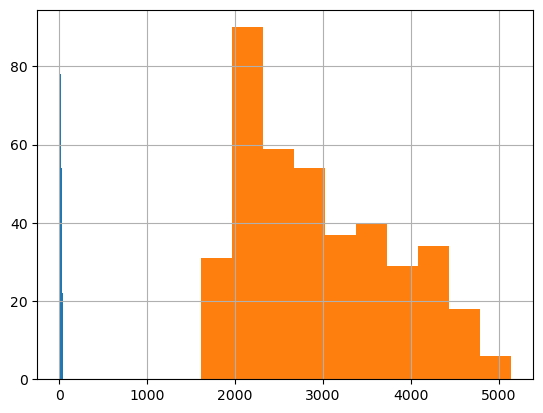

In [15]:
df['mpg'].hist()
df['weight'].hist()


In [16]:
df.groupby('cylinders')['mpg'].mean()
df.groupby('origin')['mpg'].mean()
df.groupby('model_year')['mpg'].mean()



model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

In [17]:
df[['mpg', 'weight', 'horsepower', 'displacement']].corr()



,mpg,weight,horsepower,displacement
mpg,1.000000,-0.831741,-0.778427,-0.804203
weight,-0.831741,1.000000,0.864538,0.932824
horsepower,-0.778427,0.864538,1.000000,0.897257
displacement,-0.804203,0.932824,0.897257,1.000000
